# Non-Peptide Angiotensin II Receptor Antagonists for pharmacophore identification

We explore ligands that will be used to create ligand-based pharmacophore models

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import openpharmacophore as oph
from pprint import pprint
import nglview as nv

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

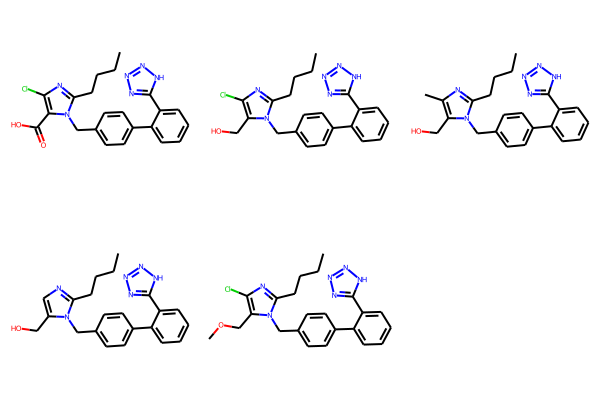

In [3]:
ligands = Chem.SmilesMolSupplier("ligands.smi")
Draw.MolsToGridImage(ligands, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

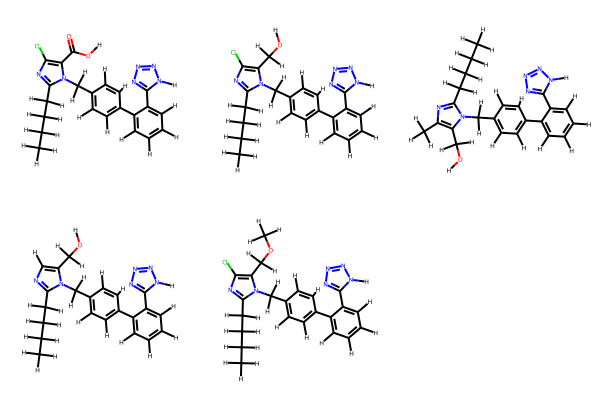

In [5]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

Draw.MolsToGridImage(pharmacophore.ligands)

In [6]:
pharmacophore.generate_conformers(ligands="all", n_confs=10)

## View 3D structures

In [8]:
index = 1
nv.show_rdkit(pharmacophore.ligands[index])

NGLWidget()

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm